In [1]:
import numpy as np
import pandas as pd

#import models from matplotlib and seaborn
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec # subplots
import seaborn as sns 

#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, recall_score, precision_score, classification_report
from sklearn.decomposition import PCA, KernelPCA 
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

palette = ["#d580a2", "#d53b49"]
sns.set()


In [2]:
data = pd.read_csv('breastCancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Exploratory data analysis ##

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# ID (values are arbitrary values) and Unamed (NaN values which offer nothing to the data) are not required so remove these columns
df = pd.DataFrame(data)
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [6]:
# Check to see if columns have been dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [7]:
# Check for null values
df.isnull()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

Only one variable is non numerical: the diagnosis. Lets have a look at the distribution for diagnosis

<Axes: xlabel='diagnosis', ylabel='count'>

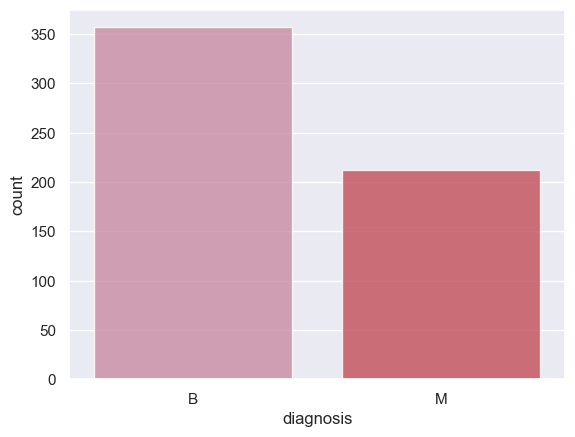

In [10]:
palette = ["#d580a2", "#d53b49"]
sns.set()
#sns.set_palette("husl")
sns.countplot(data=df, x='diagnosis', order=df.diagnosis.value_counts().index, palette = palette, alpha= 0.8)

In [11]:
df["diagnosis"].value_counts(ascending=True)

M    212
B    357
Name: diagnosis, dtype: int64

Check for outliers

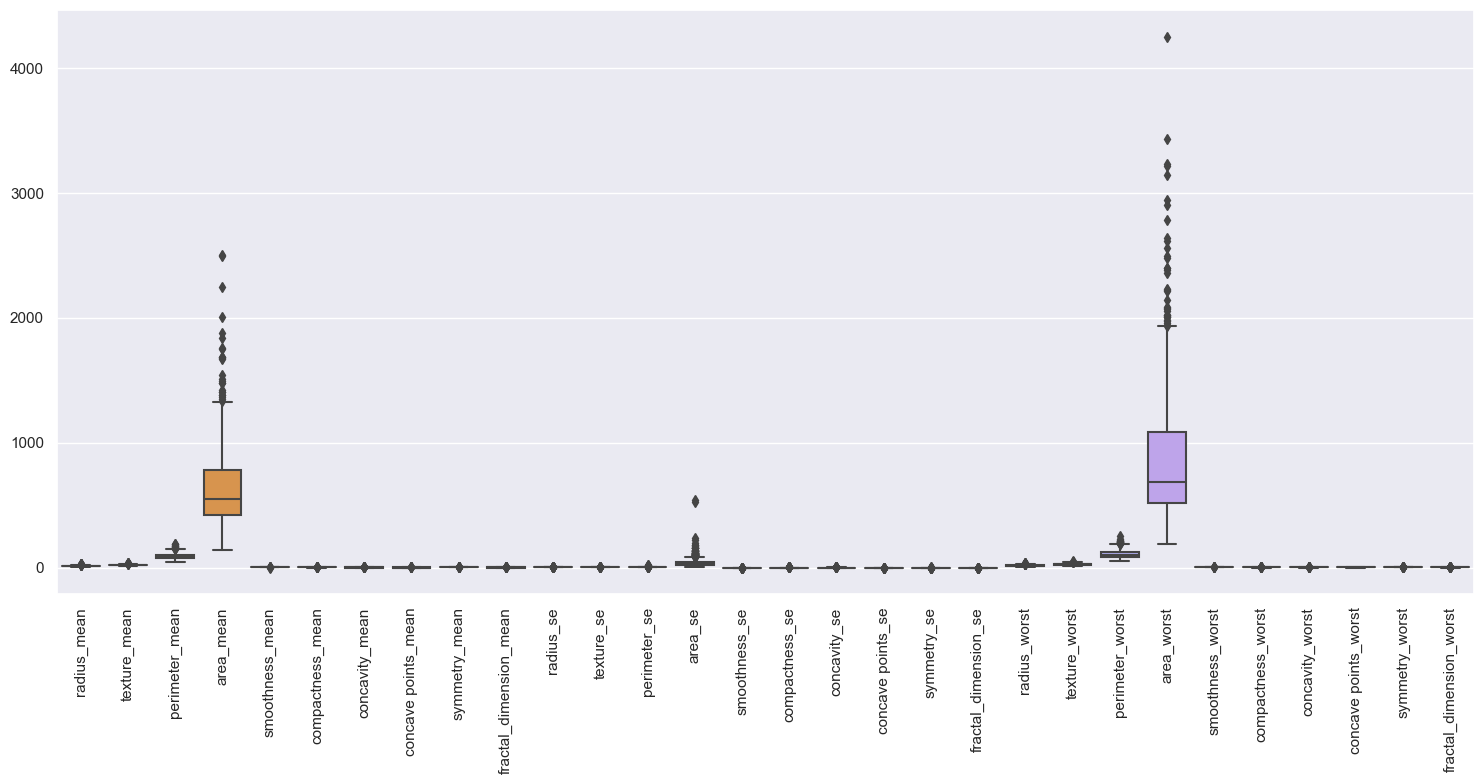

In [12]:
plt.figure(figsize=(15,8))
sns.boxplot( data = df)
plt.xticks(rotation=90)  

plt.tight_layout()

Area_mean and area_worst show considerable outliers- take a closer look

In [13]:
Q1 = df[df.columns[1:31]].quantile(0.25)
Q3 = df[df.columns[1:31]].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

radius_mean                  4.080000
texture_mean                 5.630000
perimeter_mean              28.930000
area_mean                  362.400000
smoothness_mean              0.018930
compactness_mean             0.065480
concavity_mean               0.101140
concave points_mean          0.053690
symmetry_mean                0.033800
fractal_dimension_mean       0.008420
radius_se                    0.246500
texture_se                   0.640100
perimeter_se                 1.751000
area_se                     27.340000
smoothness_se                0.002977
compactness_se               0.019370
concavity_se                 0.026960
concave points_se            0.007072
symmetry_se                  0.008320
fractal_dimension_se         0.002310
radius_worst                 5.780000
texture_worst                8.640000
perimeter_worst             41.290000
area_worst                 568.700000
smoothness_worst             0.029400
compactness_worst            0.191900
concavity_wo

In [14]:
print(df[df.columns[1:31]] < (Q1 - 1.5 * IQR)) |(df[df.columns[1:31]] > (Q3 + 1.5 * IQR))

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          False         False           False      False            False   
1          False         False           False      False            False   
2          False         False           False      False            False   
3          False         False           False      False            False   
4          False         False           False      False            False   
..           ...           ...             ...        ...              ...   
564        False         False           False      False            False   
565        False         False           False      False            False   
566        False         False           False      False            False   
567        False         False           False      False            False   
568        False         False           False      False             True   

     compactness_mean  concavity_mean  concave points_mean  sym

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

In [15]:
df_shape = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_shape.shape

C:\Users\jesse\AppData\Local\Temp\ipykernel_26188\900601333.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_shape = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


(398, 31)

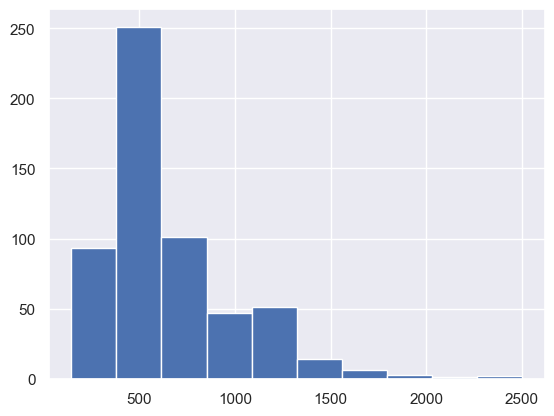

In [16]:
plt.hist(df.area_mean)
plt.show() 

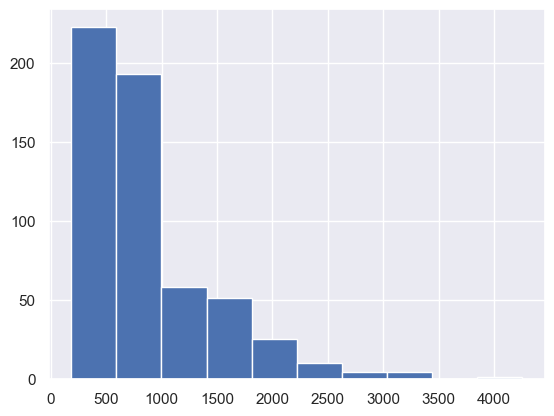

In [17]:
plt.hist(df.area_worst)
plt.show() 

<Axes: xlabel='area_mean', ylabel='diagnosis'>

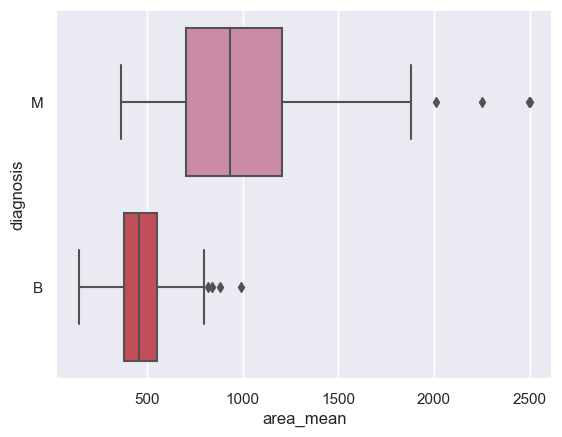

In [18]:
sns.boxplot(x=df["area_mean"], y = df["diagnosis"], palette= palette)

<Axes: xlabel='area_worst', ylabel='diagnosis'>

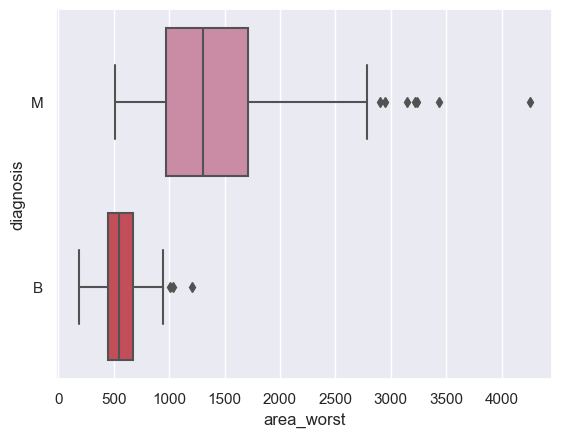

In [19]:
sns.boxplot(x=df["area_worst"], y=df["diagnosis"], palette= palette)

<Axes: xlabel='area_mean', ylabel='area_worst'>

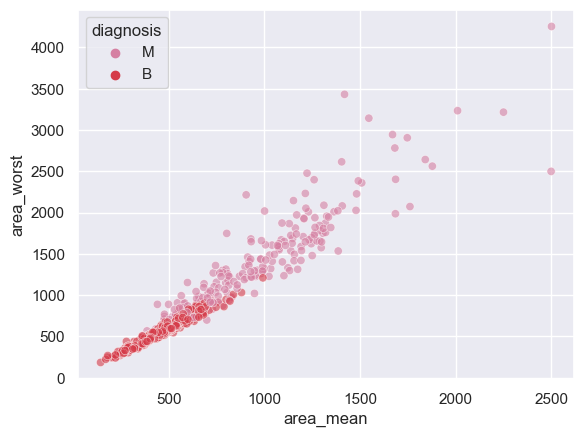

In [20]:
sns.scatterplot(data=df, x="area_mean", y="area_worst", hue="diagnosis", palette=palette, alpha=0.6)

In [21]:
# Cannot scale data with categorical columnm (diagnosis) 
scaled_data = df[df.columns[1:31]]
y =   df[df.columns[0]]
scaled_data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [22]:
scaler = StandardScaler()
scaled_features =scaler.fit_transform(scaled_data.values)
df_scaled = pd.DataFrame(scaled_data, index=scaled_data.index, columns=scaled_data.columns)

Generate Kernel Density Estimate plots where Diagnosis is set as the hue, understand whether there are any trends or correlations within the data.

In [ ]:
# Split out the full set of the main dataset's columns into separate lists for easier use.
colSet1_mean = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
colSet2_se = ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']
colSet3_worst = ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

  

In [ ]:
# Set up a subplot grid.
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25,15))


ColSet1_mean = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

# Produce kernel density estimate plots for each set of columns.
for i, column in enumerate(df[ColSet1_mean].columns):
    sns.kdeplot(data=df,
                x=column,
                hue="diagnosis", fill=True, common_norm=True, alpha=0.05,
                ax=axes[i//5,i%5])

In [ ]:
# Set up a subplot grid.
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25,15))

# Define the column set.
ColSet2_se = ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']

# Produce kernel density estimate plots for each set of columns.
for i, column in enumerate(df[ColSet2_se].columns):
    sns.kdeplot(data=df,
                x=column,
                hue="diagnosis", fill=True, common_norm=True, alpha=0.05,
                ax=axes[i//5,i%5])

In [ ]:
# Set up a subplot grid.
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25,15))

# Define the column set.
ColSet3_worst = ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

# Produce kernel density estimate plots for each set of columns.
for i, column in enumerate(df[ColSet3_worst].columns):
    sns.kdeplot(data=df,
                x=column,
                hue="diagnosis", fill=True, common_norm=True, alpha=0.05,
                ax=axes[i//5,i%5])

There may be multicolinearity here so lets look at a correlation heat map

In [ ]:
corrs = df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corrs, cmap = "RdBu", annot = True, linewidths = 0.3 ,linecolor = "black", fmt = ".2f")
plt.title("Correlation Heatmap", fontsize = 20)
plt.show()

Correlated values: 
    radius_mean + perimeter_mean
    radius_mean + area_mean
    compactness_mean + concave points_mean + concavity_mean-> keep concavity_mean
    
    compactness_se + concave points_se + concavity_se-> keep compactness_se
    
    radius_se + perimeter_se + area_se -> keep area_se
    
    radius_worst + area_worst + perimeter_worst-> keep radius_worst
    
    compactness_worst + concave points_worst + concavity_worst-> keep concavity_worst

In [ ]:
# Turn intial coleSet1_mean, coleSet2_se, colSet3_rst to dataframes to use in pairplots and get a deeper look at correlation
df1 = df[df.columns[0:10]]  

In [ ]:
df2 = df[df.columns[10:20]]
df3 = df[df.columns[20:]]

In [ ]:
# Adding the Diagnosis column to each df
extracted_col = df1["diagnosis"]
df2 = pd.concat([df2, extracted_col], axis=1)
df3 = pd.concat([df3, extracted_col], axis=1)


In [ ]:
df1_cor = df1.corr()
plt.figure(figsize=(25,23))
sns.heatmap(df1_cor, cmap = "RdBu", annot = True, linewidths = 0.3 ,linecolor = "black", fmt = ".2f")
plt.title("Correlation Heatmap for coleSet1_mean", fontsize = 20)
plt.show()

In [ ]:
sns.pairplot(df1, diag_kind = "kde" , markers = "*", hue = "diagnosis")
plt.show()

In [ ]:
df2_cor = df2.corr()
plt.figure(figsize=(25,23))
sns.heatmap(df2_cor, cmap = "RdBu", annot = True, linewidths = 0.3 ,linecolor = "black", fmt = ".2f")
plt.title("Correlation Heatmap for colSet2_se", fontsize = 20)
plt.show()

In [ ]:
sns.pairplot(df2, diag_kind = "kde" , markers = "*", hue = "diagnosis")
plt.show()

In [ ]:
df3_cor = df3.corr()
plt.figure(figsize=(25,23))
sns.heatmap(df3_cor, cmap = "RdBu", annot = True, linewidths = 0.3 ,linecolor = "black", fmt = ".2f")
plt.title("Correlation Heatmap for colSet3_worst", fontsize = 20)
plt.show()

In [ ]:
sns.pairplot(df3, diag_kind = "kde" , markers = "*", hue = "diagnosis")
plt.show()

Feature Selection with correlation and Random Forest classification

In [ ]:
drop_cols = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']

x_data = scaled_data.drop(drop_cols, axis=1)
x_data.head()

In [ ]:
x_data.info()

In [ ]:
#correlation map with little correlation
plt.subplots(figsize=(14, 14))
sns.heatmap(x_data.corr(), cmap = "RdBu", annot=True, linewidths=.5, fmt= '.1f')

Still some correlation on the heatmap, but we have reduced varibles down from 31 to 16- check the most important features using Random Forest

In [ ]:
#Change Diagnosis column to binary

In [ ]:
df1_y = pd.get_dummies(df["diagnosis"])
df_y = df1_y.drop(['M'], axis=1)
df_y.rename(columns={"B":"Diagnosis"}, inplace = True)
df_y


## Train and Test ##

In [ ]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_data, df_y, test_size=0.3, random_state=42)

# Standardize features
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Analytical models ##

In [ ]:
#random forest classifier with n_estimators=10 (default)
rf_x = RandomForestClassifier(random_state=43)      
rf_x = rf_x.fit(x_train,y_train)

recall = recall_score(y_test,rf_x.predict(x_test))
print('Recall: ', recall)

accuracy = accuracy_score(y_test,rf_x.predict(x_test))
print('Accuracy: ', accuracy)

f1 = f1_score(y_test,rf_x.predict(x_test))
print('F1 score: ', f1)

cm = confusion_matrix(y_test,rf_x.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")



Recall score is good at 98% and the accuracy and F1 score are both at 97%

I want to use Feature Recursive Elimination just to check if there could have been a better score. 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_scaled, df_y, test_size=0.3, random_state=42)

# set n_features to select to 16 to keep in line with current model
rf_x1 = RandomForestClassifier(random_state=43)      
rfe = RFE(estimator=rf_x1, n_features_to_select=16, step=1)
rfe = rfe.fit(x_train, y_train)

x_train.columns[rfe.support_]

In [ ]:
x_data.info()

When both are compared we can see some variables are different so let's rerun and see

In [ ]:
recall = recall_score(y_test, rfe.predict(x_test))
print('Recall: ', recall)

accuracy = accuracy_score(y_test, rfe.predict(x_test))
print('Accuracy: ', accuracy)

f1 = f1_score(y_test, rfe.predict(x_test))
print('F1 score: ', f1)

cm = confusion_matrix(y_test, rfe.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")


Results are the same, check to see if another model suits better. 

## Test accuracy of predictions ##

In [ ]:
# Train Logistic Regression model
classifier_lr = LogisticRegression(random_state=0)
classifier_lr.fit(x_train, y_train)

In [ ]:
# Evaluate Logistic Regression model
y_pred_lr = classifier_lr.predict(x_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
prec_lr = precision_score(y_test, y_pred_lr)
rec_lr = recall_score(y_test, y_pred_lr)

In [ ]:
# Train Random Forest Classifier
classifier_rf = RandomForestClassifier(random_state=0)
classifier_rf.fit(x_train, y_train)

In [ ]:
# Evaluate Random Forest Classifier
y_pred_rf = classifier_rf.predict(x_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)

In [ ]:

knn = KNeighborsClassifier()
knn_model = knn.fit(x_train, y_train.values.ravel())
knn_model

In [ ]:
knn.score(x_test.values,y_test)

In [ ]:
#y_pred_knn = knn.predict(x_test.values)

In [ ]:
# Code initially worked and then stopped- this seems to be a known issue from my research and implies that the data is being read as a 1d array. 

# Evaluate K Neighbors Classifier
           
#knn = KNeighborsClassifier()
#knn_model = knn.fit(x_train, y_train)
y_pred_knn = knn_model.predict(x_test.values)
acc_knn =  np.sqrt(accuracy_score(y_test, y_pred_knn))
f1_knn = f1_score(y_test, y_pred_knn)
prec_knn = precision_score(y_test, y_pred_knn)
rec_knn = recall_score(y_test, y_pred_knn)



In [ ]:
# Print results
results = pd.DataFrame([
    ['LogisticRegression', acc_lr, f1_lr, prec_lr, rec_lr],
    ['Random Forest', acc_rf, f1_rf, prec_rf, rec_rf],
    ['KNeighbors', acc_knn, f1_knn, prec_knn, rec_knn]
], columns=["Model", "Accuracy", "F1", "Precision", "Recall"])

print(results)

Logistic Regression has a higher score

## Logistic Regression Prediction ##

In [ ]:
# predict the test data and show the first 5 predictions
y_pred_lr[1:6]

In [ ]:
#predictions_lr = [ "M" if x == 0 else "B" for x in y_pred_lr]
#predictions_lr[1:6]

In [ ]:
print(classification_report(y_test, y_pred_lr, digits=3))

cfm = confusion_matrix(y_test, y_pred_lr)

true_negative = cfm[0][0]
false_positive = cfm[0][1]
false_negative = cfm[1][0]
true_positive = cfm[1][1]

print('Confusion Matrix: \n', cfm, '\n')

print('True Negative:', true_negative)
print('False Positive:', false_positive)
print('False Negative:', false_negative)
print('True Positive:', true_positive)
print('Correct Predictions', 
      round((true_negative + true_positive) / len(predictions_lr) * 100, 1), '%')

In [ ]:
cm = confusion_matrix(y_test , y_pred_lr)

plt.figure(figsize=(6,6))
sns.heatmap(cm , annot = True , cmap = 'RdBu' , fmt = 'd' , linewidths=.5, cbar=False)

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for Logistic regression')

plt.show()

## Images used for report ##

In [ ]:
# Image used for report
palette = ["#d580a2", "#d53b49"]
sns.kdeplot(data=df, x="texture_mean", hue="diagnosis", multiple="stack", palette = palette)

In [ ]:
# Image used for report
size = len(df['texture_mean'])

area = np.pi * (15 * np.random.rand( size ))**2
colors = np.random.rand( size )

plt.xlabel("texture mean")
plt.ylabel("radius mean") 
plt.scatter(df['texture_mean'], df['radius_mean'], s=area, c=colors, alpha=0.5);